In [1]:

import numpy as np
import pandas as pd

from src import ImageQuant2, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
# Import quantification model
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]

In [3]:
# Import embryos dataframe
df = pd.read_csv("../../data/ph_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)

### Quantify

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<05:50,  1.71it/s]

  1%|█▍                                                                                                         | 8/600 [00:00<00:39, 14.92it/s]

  2%|██▋                                                                                                       | 15/600 [00:00<00:21, 26.73it/s]

  4%|███▉                                                                                                      | 22/600 [00:00<00:15, 36.61it/s]

  5%|█████                                                                                                     | 29/600 [00:01<00:12, 44.60it/s]

  6%|██████▎                                                                                                   | 36/600 [00:01<00:11, 50.31it/s]

  7%|███████▊                                                                                                  | 44/600 [00:01<00:09, 56.76it/s]

  9%|█████████▏                                                                                                | 52/600 [00:01<00:08, 61.64it/s]

 10%|██████████▌                                                                                               | 60/600 [00:01<00:08, 65.41it/s]

 11%|████████████                                                                                              | 68/600 [00:01<00:07, 67.71it/s]

 13%|█████████████▍                                                                                            | 76/600 [00:01<00:07, 69.65it/s]

 14%|██████████████▊                                                                                           | 84/600 [00:01<00:07, 70.21it/s]

 15%|████████████████▎                                                                                         | 92/600 [00:01<00:07, 70.92it/s]

 17%|█████████████████▌                                                                                       | 100/600 [00:01<00:07, 70.37it/s]

 18%|██████████████████▉                                                                                      | 108/600 [00:02<00:06, 71.25it/s]

 19%|████████████████████▎                                                                                    | 116/600 [00:02<00:06, 70.27it/s]

 21%|█████████████████████▋                                                                                   | 124/600 [00:02<00:06, 71.31it/s]

 22%|███████████████████████                                                                                  | 132/600 [00:02<00:06, 68.77it/s]

 23%|████████████████████████▎                                                                                | 139/600 [00:02<00:06, 67.55it/s]

 24%|█████████████████████████▌                                                                               | 146/600 [00:02<00:06, 65.47it/s]

 26%|██████████████████████████▉                                                                              | 154/600 [00:02<00:06, 67.46it/s]

 27%|████████████████████████████▎                                                                            | 162/600 [00:02<00:06, 69.00it/s]

 28%|█████████████████████████████▊                                                                           | 170/600 [00:03<00:06, 70.16it/s]

 30%|███████████████████████████████▏                                                                         | 178/600 [00:03<00:06, 69.45it/s]

 31%|████████████████████████████████▌                                                                        | 186/600 [00:03<00:05, 69.84it/s]

 32%|█████████████████████████████████▊                                                                       | 193/600 [00:03<00:05, 69.63it/s]

 33%|███████████████████████████████████                                                                      | 200/600 [00:03<00:05, 68.43it/s]

 34%|████████████████████████████████████▏                                                                    | 207/600 [00:03<00:05, 68.54it/s]

 36%|█████████████████████████████████████▍                                                                   | 214/600 [00:03<00:05, 68.88it/s]

 37%|██████████████████████████████████████▋                                                                  | 221/600 [00:03<00:05, 67.70it/s]

 38%|████████████████████████████████████████                                                                 | 229/600 [00:03<00:05, 67.99it/s]

 39%|█████████████████████████████████████████▎                                                               | 236/600 [00:03<00:05, 67.05it/s]

 40%|██████████████████████████████████████████▌                                                              | 243/600 [00:04<00:05, 66.79it/s]

 42%|███████████████████████████████████████████▊                                                             | 250/600 [00:04<00:05, 66.73it/s]

 43%|████████████████████████████████████████████▉                                                            | 257/600 [00:04<00:05, 67.27it/s]

 44%|██████████████████████████████████████████████▏                                                          | 264/600 [00:04<00:04, 67.92it/s]

 45%|███████████████████████████████████████████████▍                                                         | 271/600 [00:04<00:04, 68.26it/s]

 46%|████████████████████████████████████████████████▋                                                        | 278/600 [00:04<00:04, 68.41it/s]

 48%|█████████████████████████████████████████████████▉                                                       | 285/600 [00:04<00:04, 67.19it/s]

 49%|███████████████████████████████████████████████████                                                      | 292/600 [00:04<00:04, 66.77it/s]

 50%|████████████████████████████████████████████████████▎                                                    | 299/600 [00:04<00:04, 66.89it/s]

 51%|█████████████████████████████████████████████████████▌                                                   | 306/600 [00:05<00:04, 66.10it/s]

 52%|██████████████████████████████████████████████████████▊                                                  | 313/600 [00:05<00:04, 66.85it/s]

 53%|████████████████████████████████████████████████████████                                                 | 320/600 [00:05<00:04, 65.77it/s]

 55%|█████████████████████████████████████████████████████████▍                                               | 328/600 [00:05<00:04, 67.99it/s]

 56%|██████████████████████████████████████████████████████████▊                                              | 336/600 [00:05<00:03, 69.56it/s]

 57%|████████████████████████████████████████████████████████████                                             | 343/600 [00:05<00:03, 66.49it/s]

 58%|█████████████████████████████████████████████████████████████▎                                           | 350/600 [00:05<00:03, 66.74it/s]

 60%|██████████████████████████████████████████████████████████████▍                                          | 357/600 [00:05<00:03, 67.61it/s]

 61%|███████████████████████████████████████████████████████████████▋                                         | 364/600 [00:05<00:03, 66.51it/s]

 62%|████████████████████████████████████████████████████████████████▉                                        | 371/600 [00:05<00:03, 66.55it/s]

 63%|██████████████████████████████████████████████████████████████████▏                                      | 378/600 [00:06<00:03, 63.32it/s]

 64%|███████████████████████████████████████████████████████████████████▍                                     | 385/600 [00:06<00:03, 63.93it/s]

 65%|████████████████████████████████████████████████████████████████████▌                                    | 392/600 [00:06<00:03, 65.00it/s]

 66%|█████████████████████████████████████████████████████████████████████▊                                   | 399/600 [00:06<00:03, 65.42it/s]

 68%|███████████████████████████████████████████████████████████████████████                                  | 406/600 [00:06<00:02, 66.27it/s]

 69%|████████████████████████████████████████████████████████████████████████▎                                | 413/600 [00:06<00:02, 66.97it/s]

 70%|█████████████████████████████████████████████████████████████████████████▌                               | 420/600 [00:06<00:02, 66.67it/s]

 71%|██████████████████████████████████████████████████████████████████████████▋                              | 427/600 [00:06<00:02, 67.19it/s]

 72%|███████████████████████████████████████████████████████████████████████████▉                             | 434/600 [00:06<00:02, 67.09it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▏                           | 441/600 [00:07<00:02, 67.64it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▍                          | 448/600 [00:07<00:02, 67.04it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▋                         | 455/600 [00:07<00:02, 67.02it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▊                        | 462/600 [00:07<00:02, 67.61it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████                       | 469/600 [00:07<00:01, 66.71it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████▎                     | 476/600 [00:07<00:01, 67.11it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▋                    | 484/600 [00:07<00:01, 69.07it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████                   | 492/600 [00:07<00:01, 70.02it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 499/600 [00:07<00:01, 68.34it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▌                | 506/600 [00:08<00:01, 67.41it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▊               | 513/600 [00:08<00:01, 65.02it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████              | 520/600 [00:08<00:01, 65.33it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████▏            | 527/600 [00:08<00:01, 65.46it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████▍           | 534/600 [00:08<00:01, 64.92it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 541/600 [00:08<00:00, 64.07it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 548/600 [00:08<00:00, 64.95it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 555/600 [00:08<00:00, 65.68it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▎      | 562/600 [00:08<00:00, 65.68it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▌     | 569/600 [00:08<00:00, 66.26it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 576/600 [00:09<00:00, 66.07it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████   | 583/600 [00:09<00:00, 65.62it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 590/600 [00:09<00:00, 65.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 597/600 [00:09<00:00, 64.65it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 63.43it/s]

{1565367567, 1556902036, 1565359132, 1556901937, 1565357105, 1556902453, 1565360309, 1565359415, 1565359289, 1556902969, 1565360954, 1565360828, 1565356990, 1565366847, 1565360705, 1565356740, 1565359558, 1565356359, 1565360584, 1559137737, 1565359689, 1565367111, 1565360221, 1565358687, 1559137889, 1565357282, 1565356899, 1565358564, 1556901861, 1565367659, 1565367278, 1565367023}
{1565367567, 1556902036, 1565359132, 1556901937, 1565357105, 1556902453, 1565360309, 1565359415, 1565359289, 1556902969, 1565360954, 1565360828, 1565356990, 1565366847, 1565360705, 1565356740, 1565359558, 1565356359, 1565360584, 1559137737, 1565359689, 1565367111, 1565360221, 1565358687, 1559137889, 1565357282, 1565356899, 1565358564, 1556901861, 1565367659, 1565367278, 1565367023}


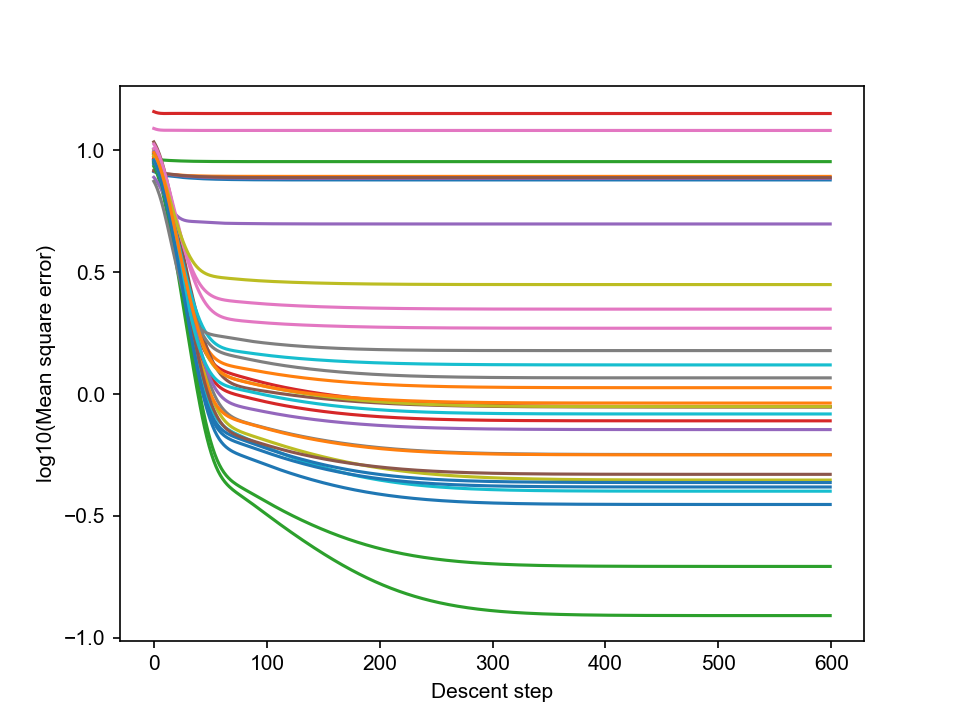

In [4]:
# Import data
paths = df.Path.to_list()
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

# Run quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg)
iq.quantify()

# Plot loss curve
iq.plot_losses(log=True)

# Save results
print(set(df.EmbryoID))
res = iq.compile_res(ids=[str(x) for x in df["EmbryoID"].to_list()])
print(set(res.EmbryoID))
res["Membrane signal"] *= calibration_factor
res.to_csv("../../data/ph_quantification.csv", index=False)